In [1]:
import pandas as pd
df=pd.read_csv('MFI-Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [2]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import datetime

%matplotlib inline

import seaborn as sns
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
df.shape

(209593, 37)

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(209593, 37)

In [9]:
df.head(5).T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
label,0,1,1,1,1
msisdn,21408I70789,76462I70374,17943I70372,55773I70781,03813I82730
aon,272.0,712.0,535.0,241.0,947.0
daily_decr30,3055.05,12122.0,1398.0,21.228,150.619333
daily_decr90,3065.15,12124.75,1398.0,21.228,150.619333
rental30,220.13,3691.26,900.13,159.42,1098.9
rental90,260.13,3691.26,900.13,159.42,1098.9
last_rech_date_ma,2.0,20.0,3.0,41.0,4.0
last_rech_date_da,0.0,0.0,0.0,0.0,0.0


In [10]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


It gives us the mean , median, standard deviation, minimum and maximum value of all th numerical columns present inth dataset.

In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# Data Cleaning

<AxesSubplot:>

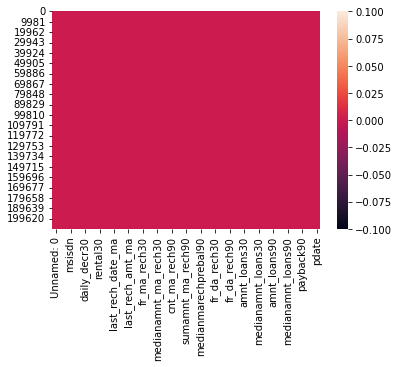

In [12]:
sns.heatmap(df.isnull())

Visual representation not having any null values in the numerical columns.

# Exploratory Data Analysis    

# Univariate Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

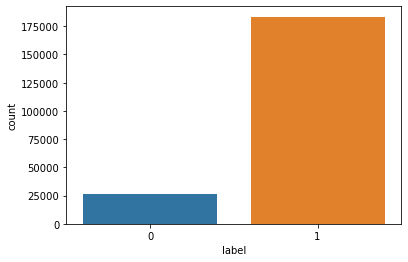

In [13]:
sns.countplot(df['label'])

<AxesSubplot:xlabel='aon', ylabel='Density'>

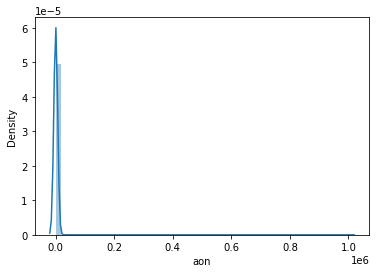

In [14]:
sns.distplot(df['aon'])

Here  we can see that the data is normally distributed

<AxesSubplot:xlabel='daily_decr90', ylabel='Count'>

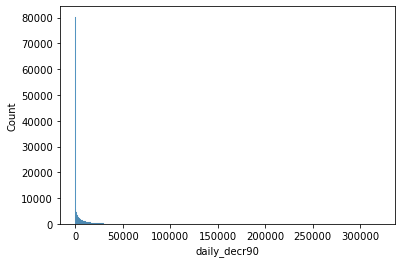

In [15]:
sns.histplot(df['daily_decr90'])

The data is normally distributed

<AxesSubplot:xlabel='rental30', ylabel='Count'>

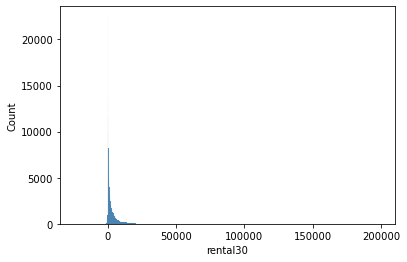

In [16]:
sns.histplot(df['rental30'])

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

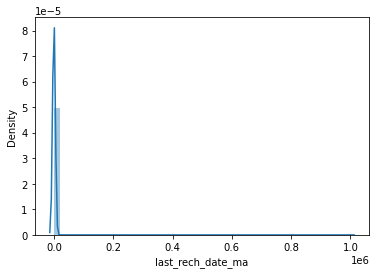

In [17]:
sns.distplot(df['last_rech_date_ma'])

Number of days till last recharge of main account has normal distribution of data

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

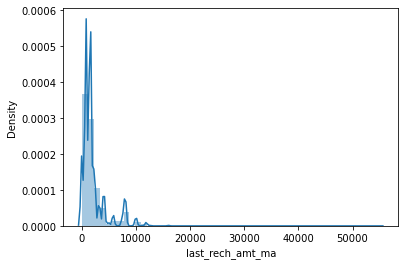

In [18]:
sns.distplot(df['last_rech_amt_ma'])

And looks like its not normal distribution of data

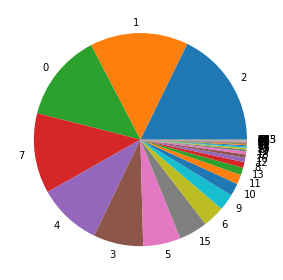

In [19]:
plt.pie(df['cnt_ma_rech30'].value_counts(),labels=df['cnt_ma_rech30'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Max 2,1,7 and 0 number of times main account got recharged in last 30days

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

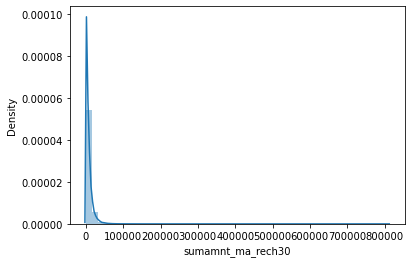

In [20]:
sns.distplot(df['sumamnt_ma_rech30'])

sumamnt_ma_rech30 has normalized data

<AxesSubplot:xlabel='medianamnt_ma_rech30', ylabel='Density'>

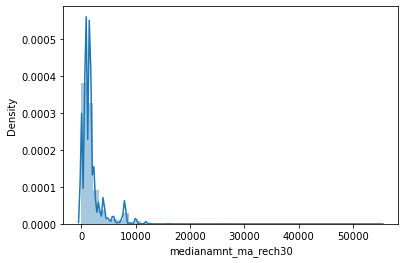

In [21]:
sns.distplot(df['medianamnt_ma_rech30'])

medianamnt_ma_rech30 not having a normalized data.

<AxesSubplot:xlabel='medianmarechprebal30', ylabel='Density'>

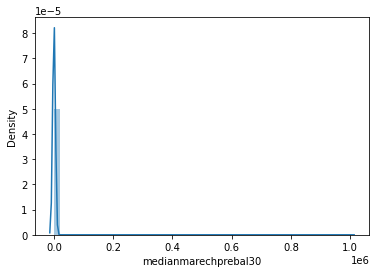

In [22]:
sns.distplot(df['medianmarechprebal30'])

medianmarechprebal30 normalised data

<AxesSubplot:xlabel='cnt_ma_rech90'>

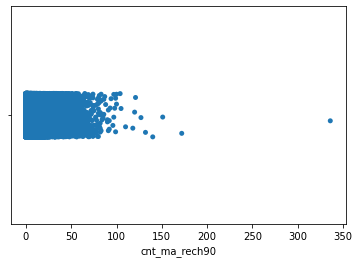

In [23]:
sns.stripplot(df['cnt_ma_rech90'])

'cnt_ma_rech90' has data scattered in range 0 to 100

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='Density'>

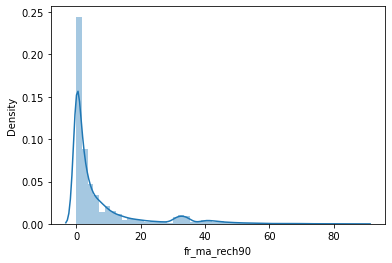

In [24]:
sns.distplot(df['fr_ma_rech90'])

fr_ma_rech90 having almost normal distribution data

<AxesSubplot:xlabel='sumamnt_ma_rech90', ylabel='Density'>

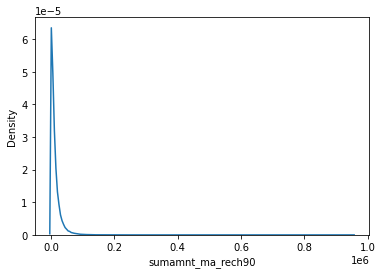

In [25]:
sns.kdeplot(df['sumamnt_ma_rech90'])

sumamnt_ma_rech90 has almost normal distribution of data

<AxesSubplot:xlabel='medianamnt_ma_rech90'>

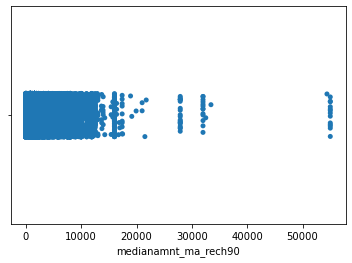

In [26]:
sns.stripplot(df['medianamnt_ma_rech90'])

medianam nt_ma_rech90 has maximum data scattered in range 0 to 15000

<AxesSubplot:xlabel='medianmarechprebal90'>

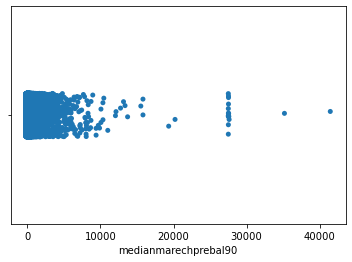

In [27]:
sns.stripplot(df['medianmarechprebal90'])

medianmarechprebal90 has maximum data scattered in range of 0 to 7500

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

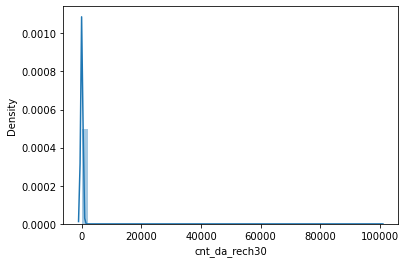

In [28]:
sns.distplot(df['cnt_da_rech30'])

cnt_da_rech30 has very normal distribution of the data

<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

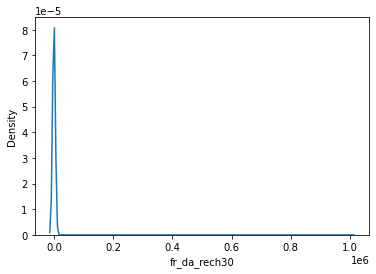

In [29]:
sns.kdeplot(df['fr_da_rech30'])

fr_da_rech30 its contributed very normal data

In [30]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

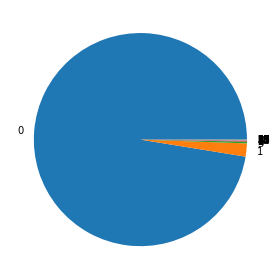

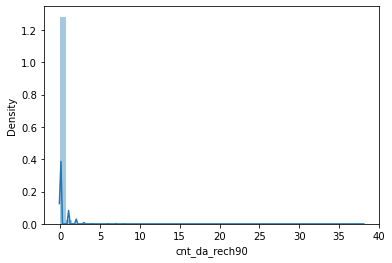

In [31]:
plt.pie(df['cnt_da_rech90'].value_counts(),labels=df['cnt_da_rech90'].unique(),shadow=False)
plt.tight_layout()
plt.show()
sns.distplot(df['cnt_da_rech90'])
plt.show()

Maximum data valued at '0'

<AxesSubplot:xlabel='fr_da_rech90'>

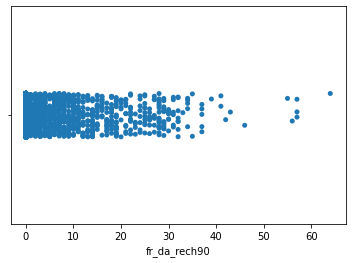

In [32]:
sns.stripplot(df['fr_da_rech90'])

fr_da_rech90 has maximum data scattered in range 0 to 30

<AxesSubplot:xlabel='cnt_loans30', ylabel='Density'>

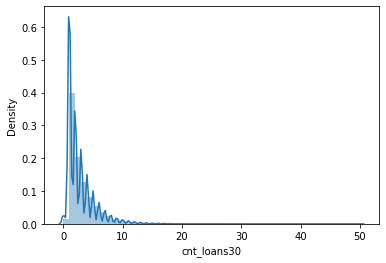

In [33]:
sns.distplot(df['cnt_loans30'])

cnt_loans30 does not have normalised data distribution

<AxesSubplot:xlabel='maxamnt_loans30'>

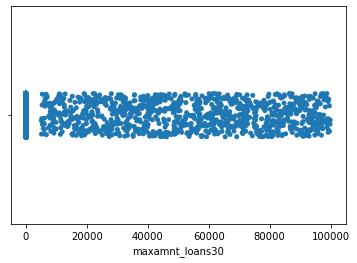

In [34]:
sns.stripplot(df['maxamnt_loans30'])

maxamnt_loans30 almost data contributed equally

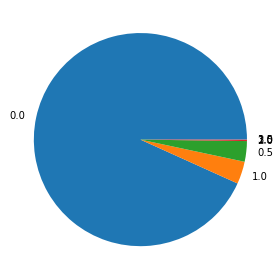

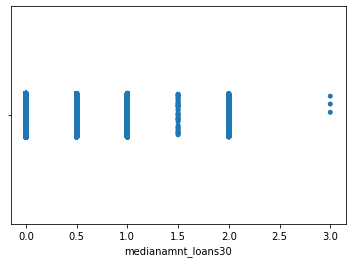

In [35]:
plt.pie(df['medianamnt_loans30'].value_counts(),labels=df['medianamnt_loans30'].unique(),shadow=False)
plt.tight_layout()
plt.show()
sns.stripplot(df['medianamnt_loans30'])
plt.show()

Median of amounts of loan taken by the user in last 30 days is 0, 5, 10, 15, 20 and 30. Though the frequency at 15 and 30 is low.

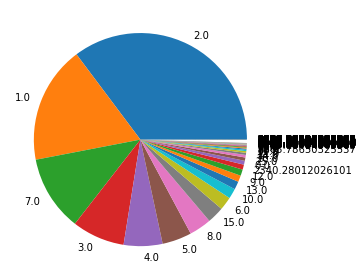

In [36]:
plt.pie(df['cnt_loans90'].value_counts(),labels=df['cnt_loans90'].unique(),shadow=False)
plt.tight_layout()
plt.show()

cnt_loans90 maximum data distributed for value 2.0

<AxesSubplot:xlabel='amnt_loans90'>

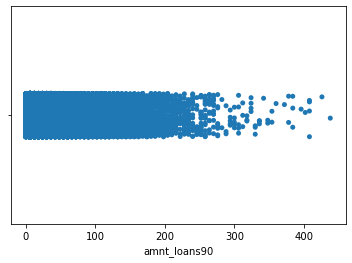

In [37]:
sns.stripplot(df['amnt_loans90'])

amnt_loans90 value highly in range 0 to 200

<AxesSubplot:xlabel='maxamnt_loans90'>

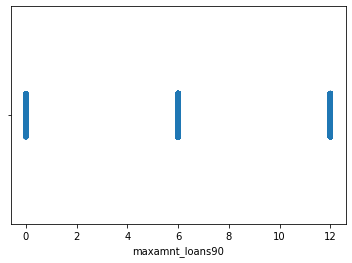

In [38]:
sns.stripplot(df['maxamnt_loans90'])

There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively. Otherwise it's 0.

<AxesSubplot:xlabel='medianamnt_loans90'>

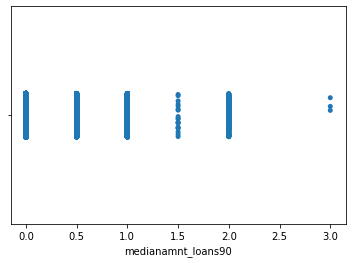

In [39]:
sns.stripplot(df['medianamnt_loans90'])

medianamnt_loans90 of loan taken by the user last 90days is 0,5,10,15,20, and 30 though the frequency at 15 and 30

<AxesSubplot:xlabel='payback30'>

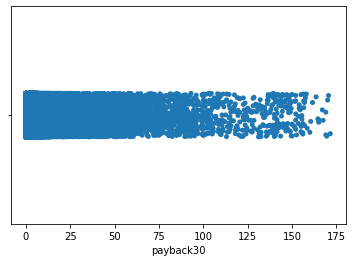

In [40]:
sns.stripplot(df['payback30'])

payback30 is very densed in range 0 to100

<AxesSubplot:xlabel='payback90', ylabel='Density'>

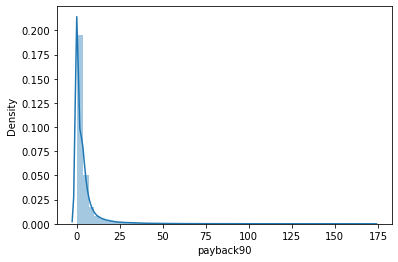

In [41]:
sns.distplot(df['payback90'])

It is almost normally distributed data

<AxesSubplot:xlabel='pcircle', ylabel='Count'>

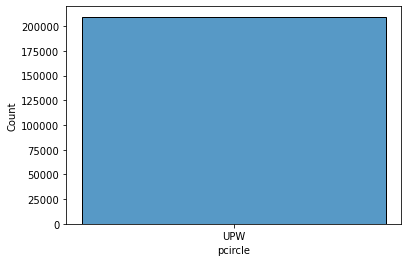

In [42]:
sns.histplot(df['pcircle'])

Look like it is having only one value. so we can drop this column

<AxesSubplot:xlabel='pdate', ylabel='Count'>

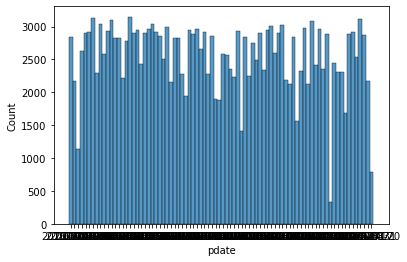

In [43]:
sns.histplot(df['pdate'])

The data is widely distributed

There are lot more outliers present in the data    


Now we are going to drop unwanted columns

In [44]:
df.drop(['Unnamed: 0','msisdn','pdate','pcircle','daily_decr30'],axis=1,inplace=True)

# Multivariate Analysis

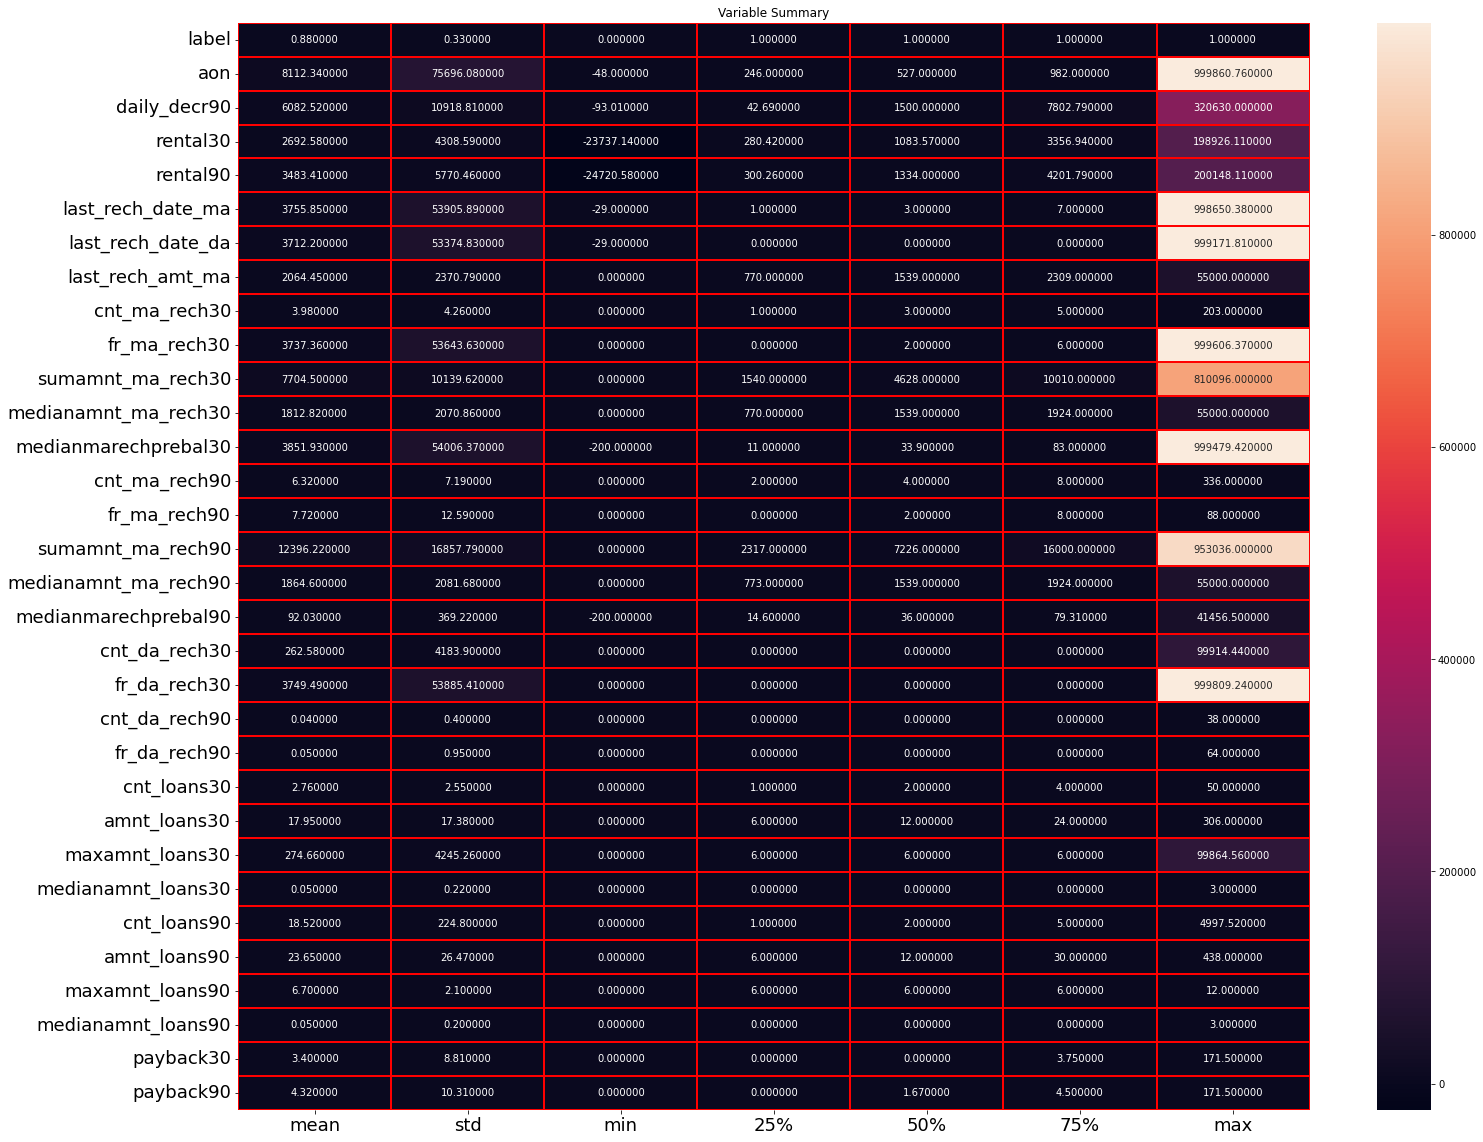

In [45]:
plt.figure(figsize=(24,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='red',annot=True,fmt='f',color='green')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

From the above plot we are determining mean, standard deviation, median, minimum and maximum of each column.

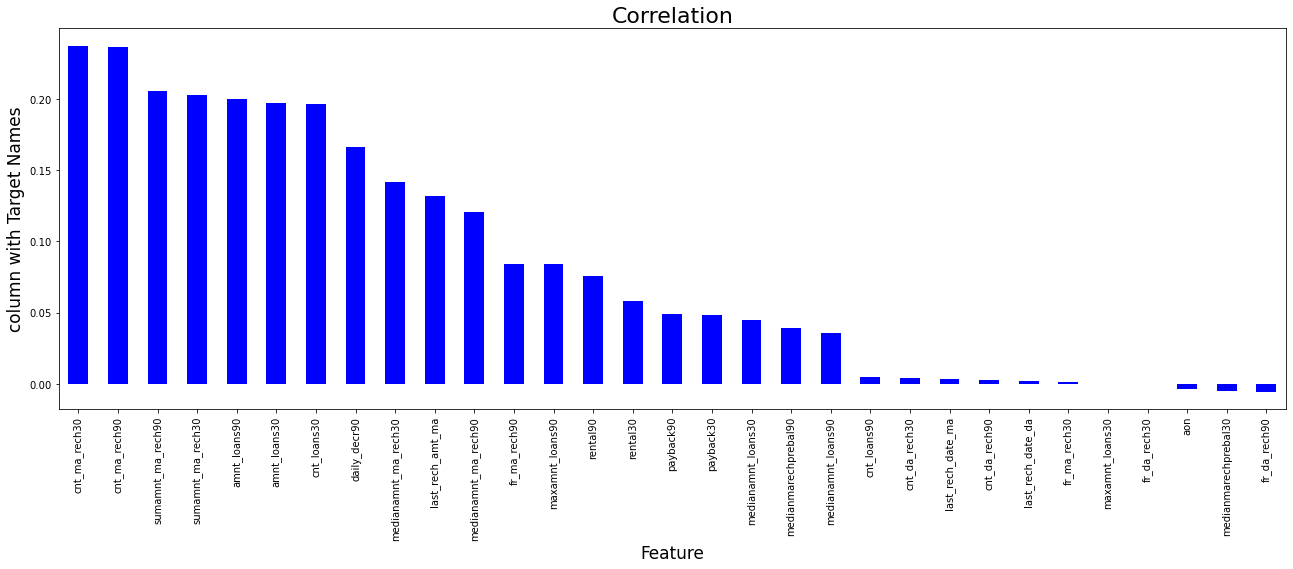

In [46]:
dfc=df.corr()
plt.figure(figsize=(22,7))
dfc['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='b')
plt.ylabel('column with Target Names',fontsize=17)
plt.xlabel('Feature',fontsize=17)
plt.title('Correlation',fontsize=22)
plt.show()

All the features except 'aon', 'medianmarechprebal30' and 'fr_da_rech90' are positively correlated to the target variable. 'maxamnt_loans30' and 'fr_da_rech30' have negligible relation to the target variable.

<AxesSubplot:>

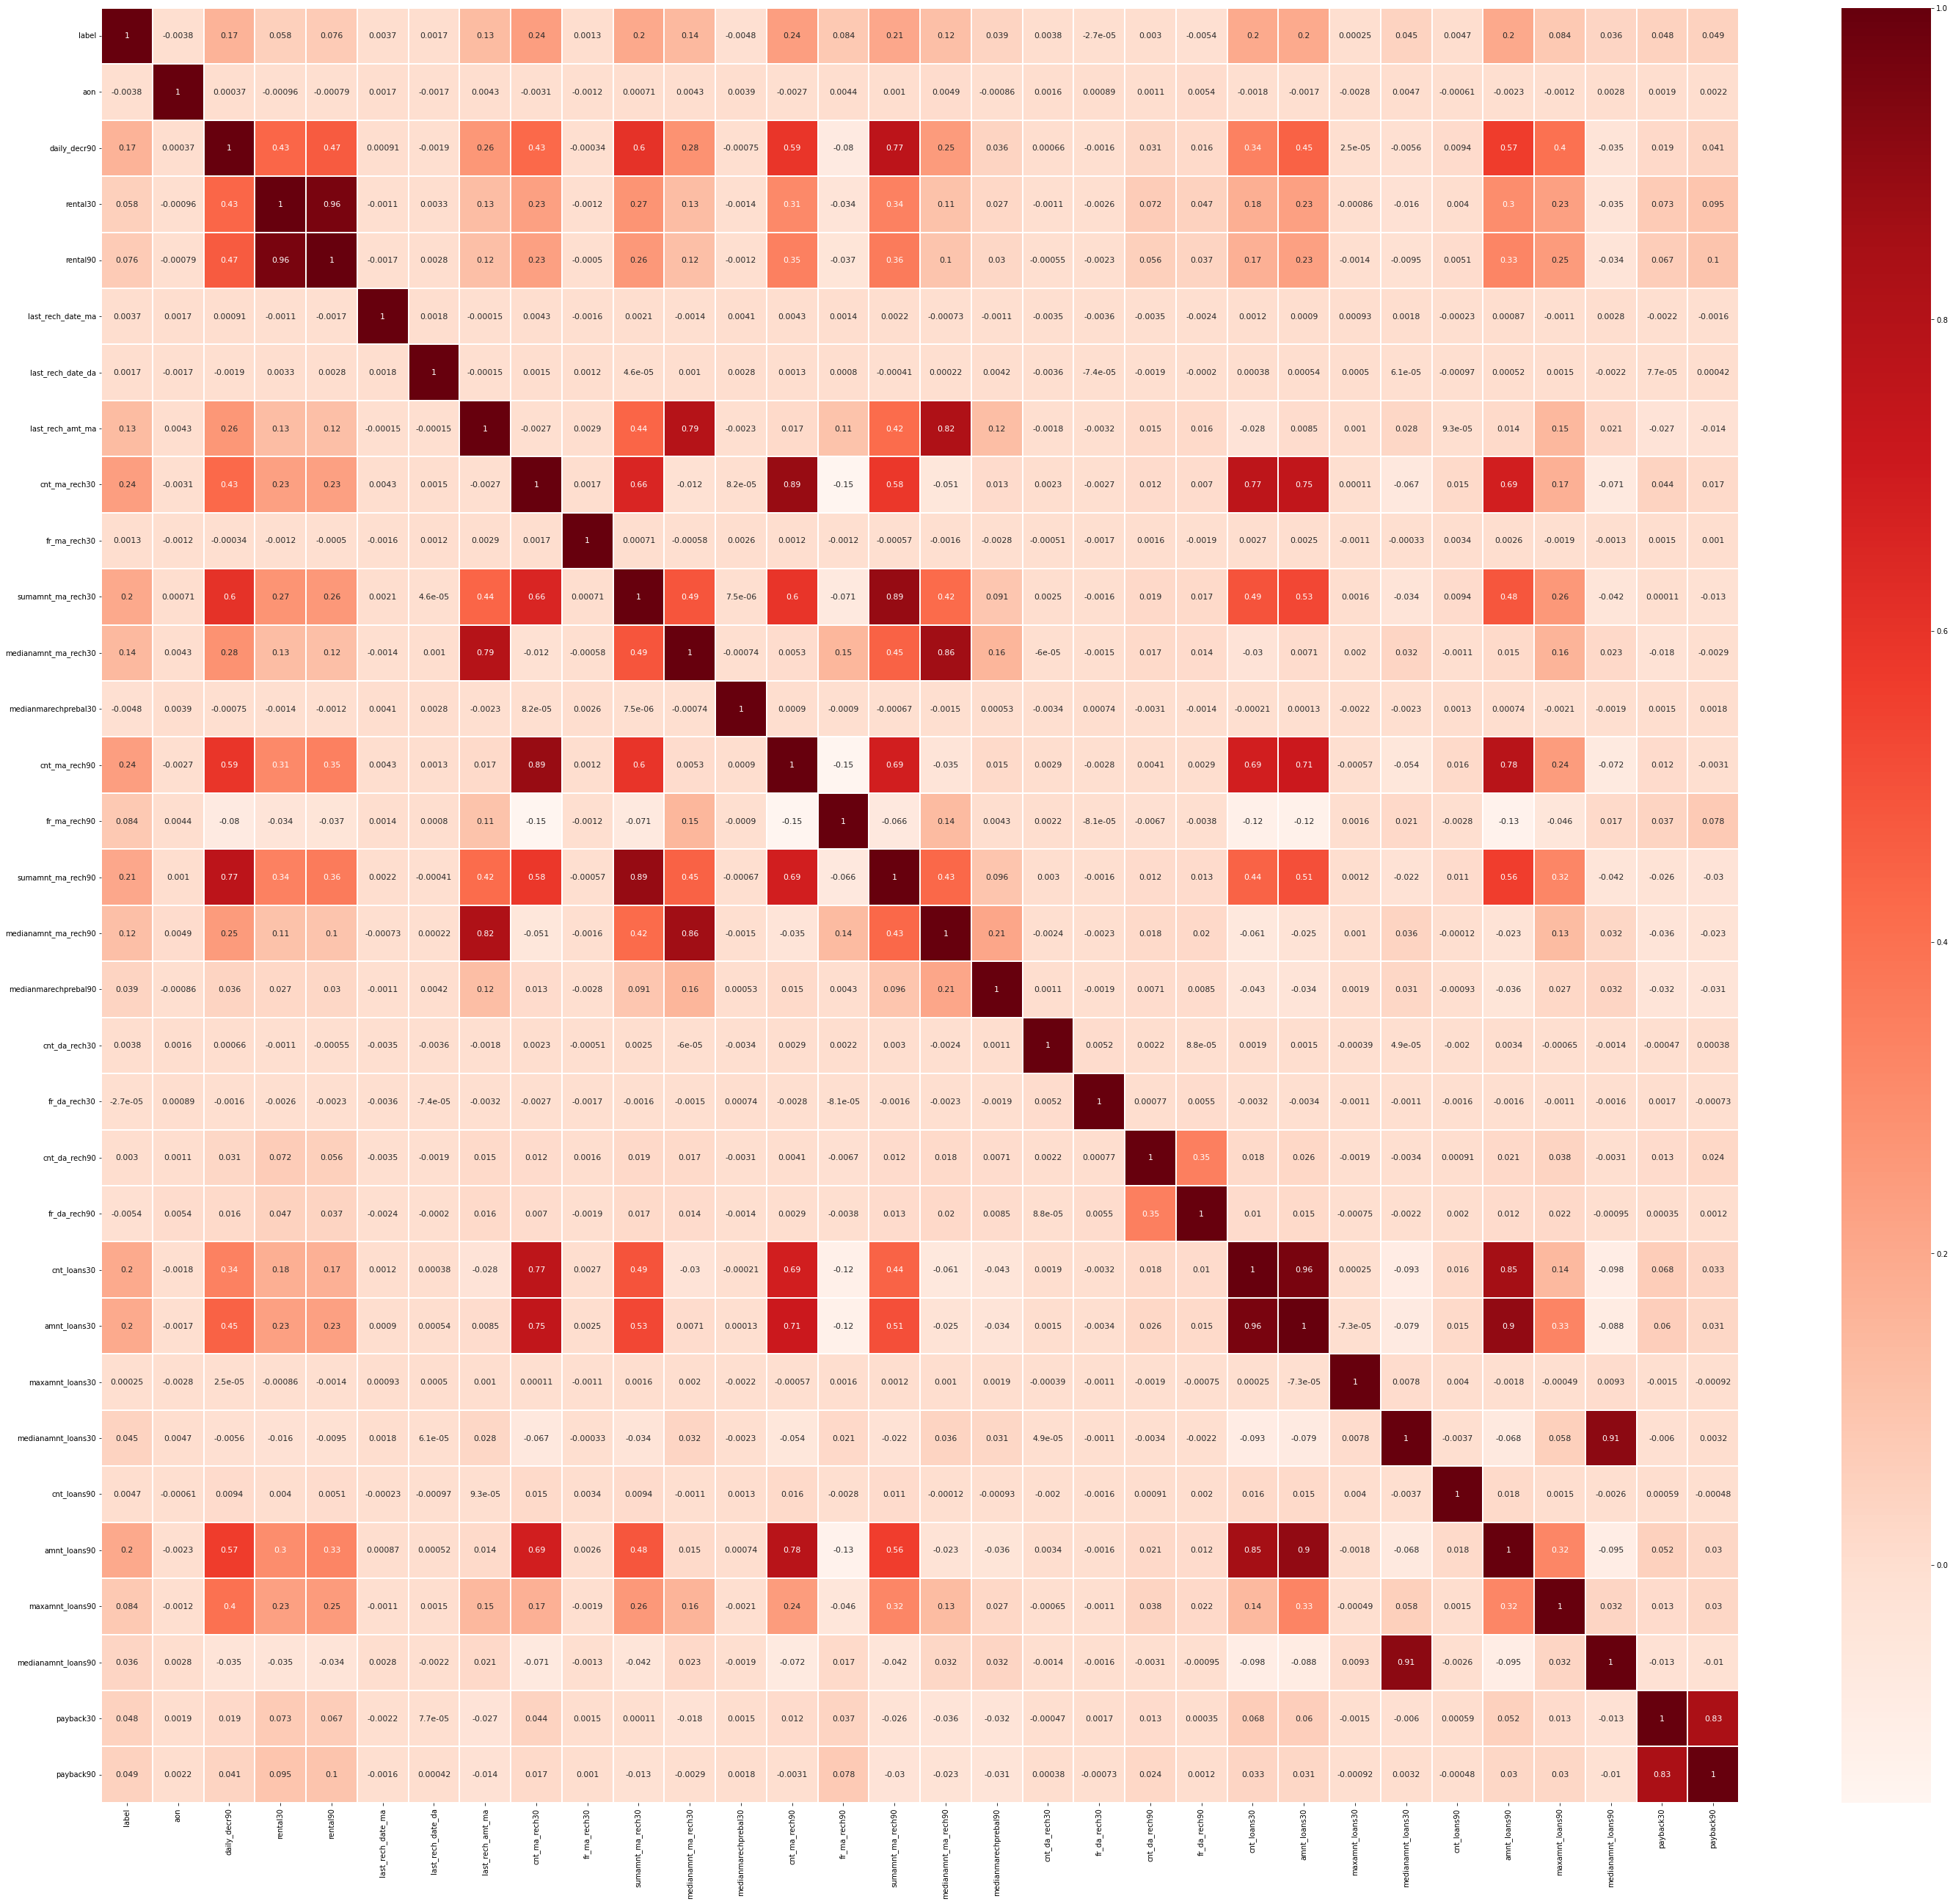

In [47]:
plt.figure(figsize=(50,45))
sns.heatmap(df.corr(), linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":11})

There exist a lot of multicollinearity between 'fr_da_rech30' and 'fr_da_rech90'; 'maxamnt_loans30' and 'maxamnt_loans90' ; 'rental30' and 'rental90'; 'cnt_ma_rech30' and 'cnt_ma_rech90' ; 'sumamnt_ma_rech30' and 'sumamnt_ma_rech90' ; 'cnt_loans30' and 'cnt_loans90' ; 'amnt_loans30' and 'amnt_loans90' ; 'medianamnt_loans30' and 'medianamnt_loans90' . Hence we will drop either column from each group which is least correlated with the target column.

<AxesSubplot:>

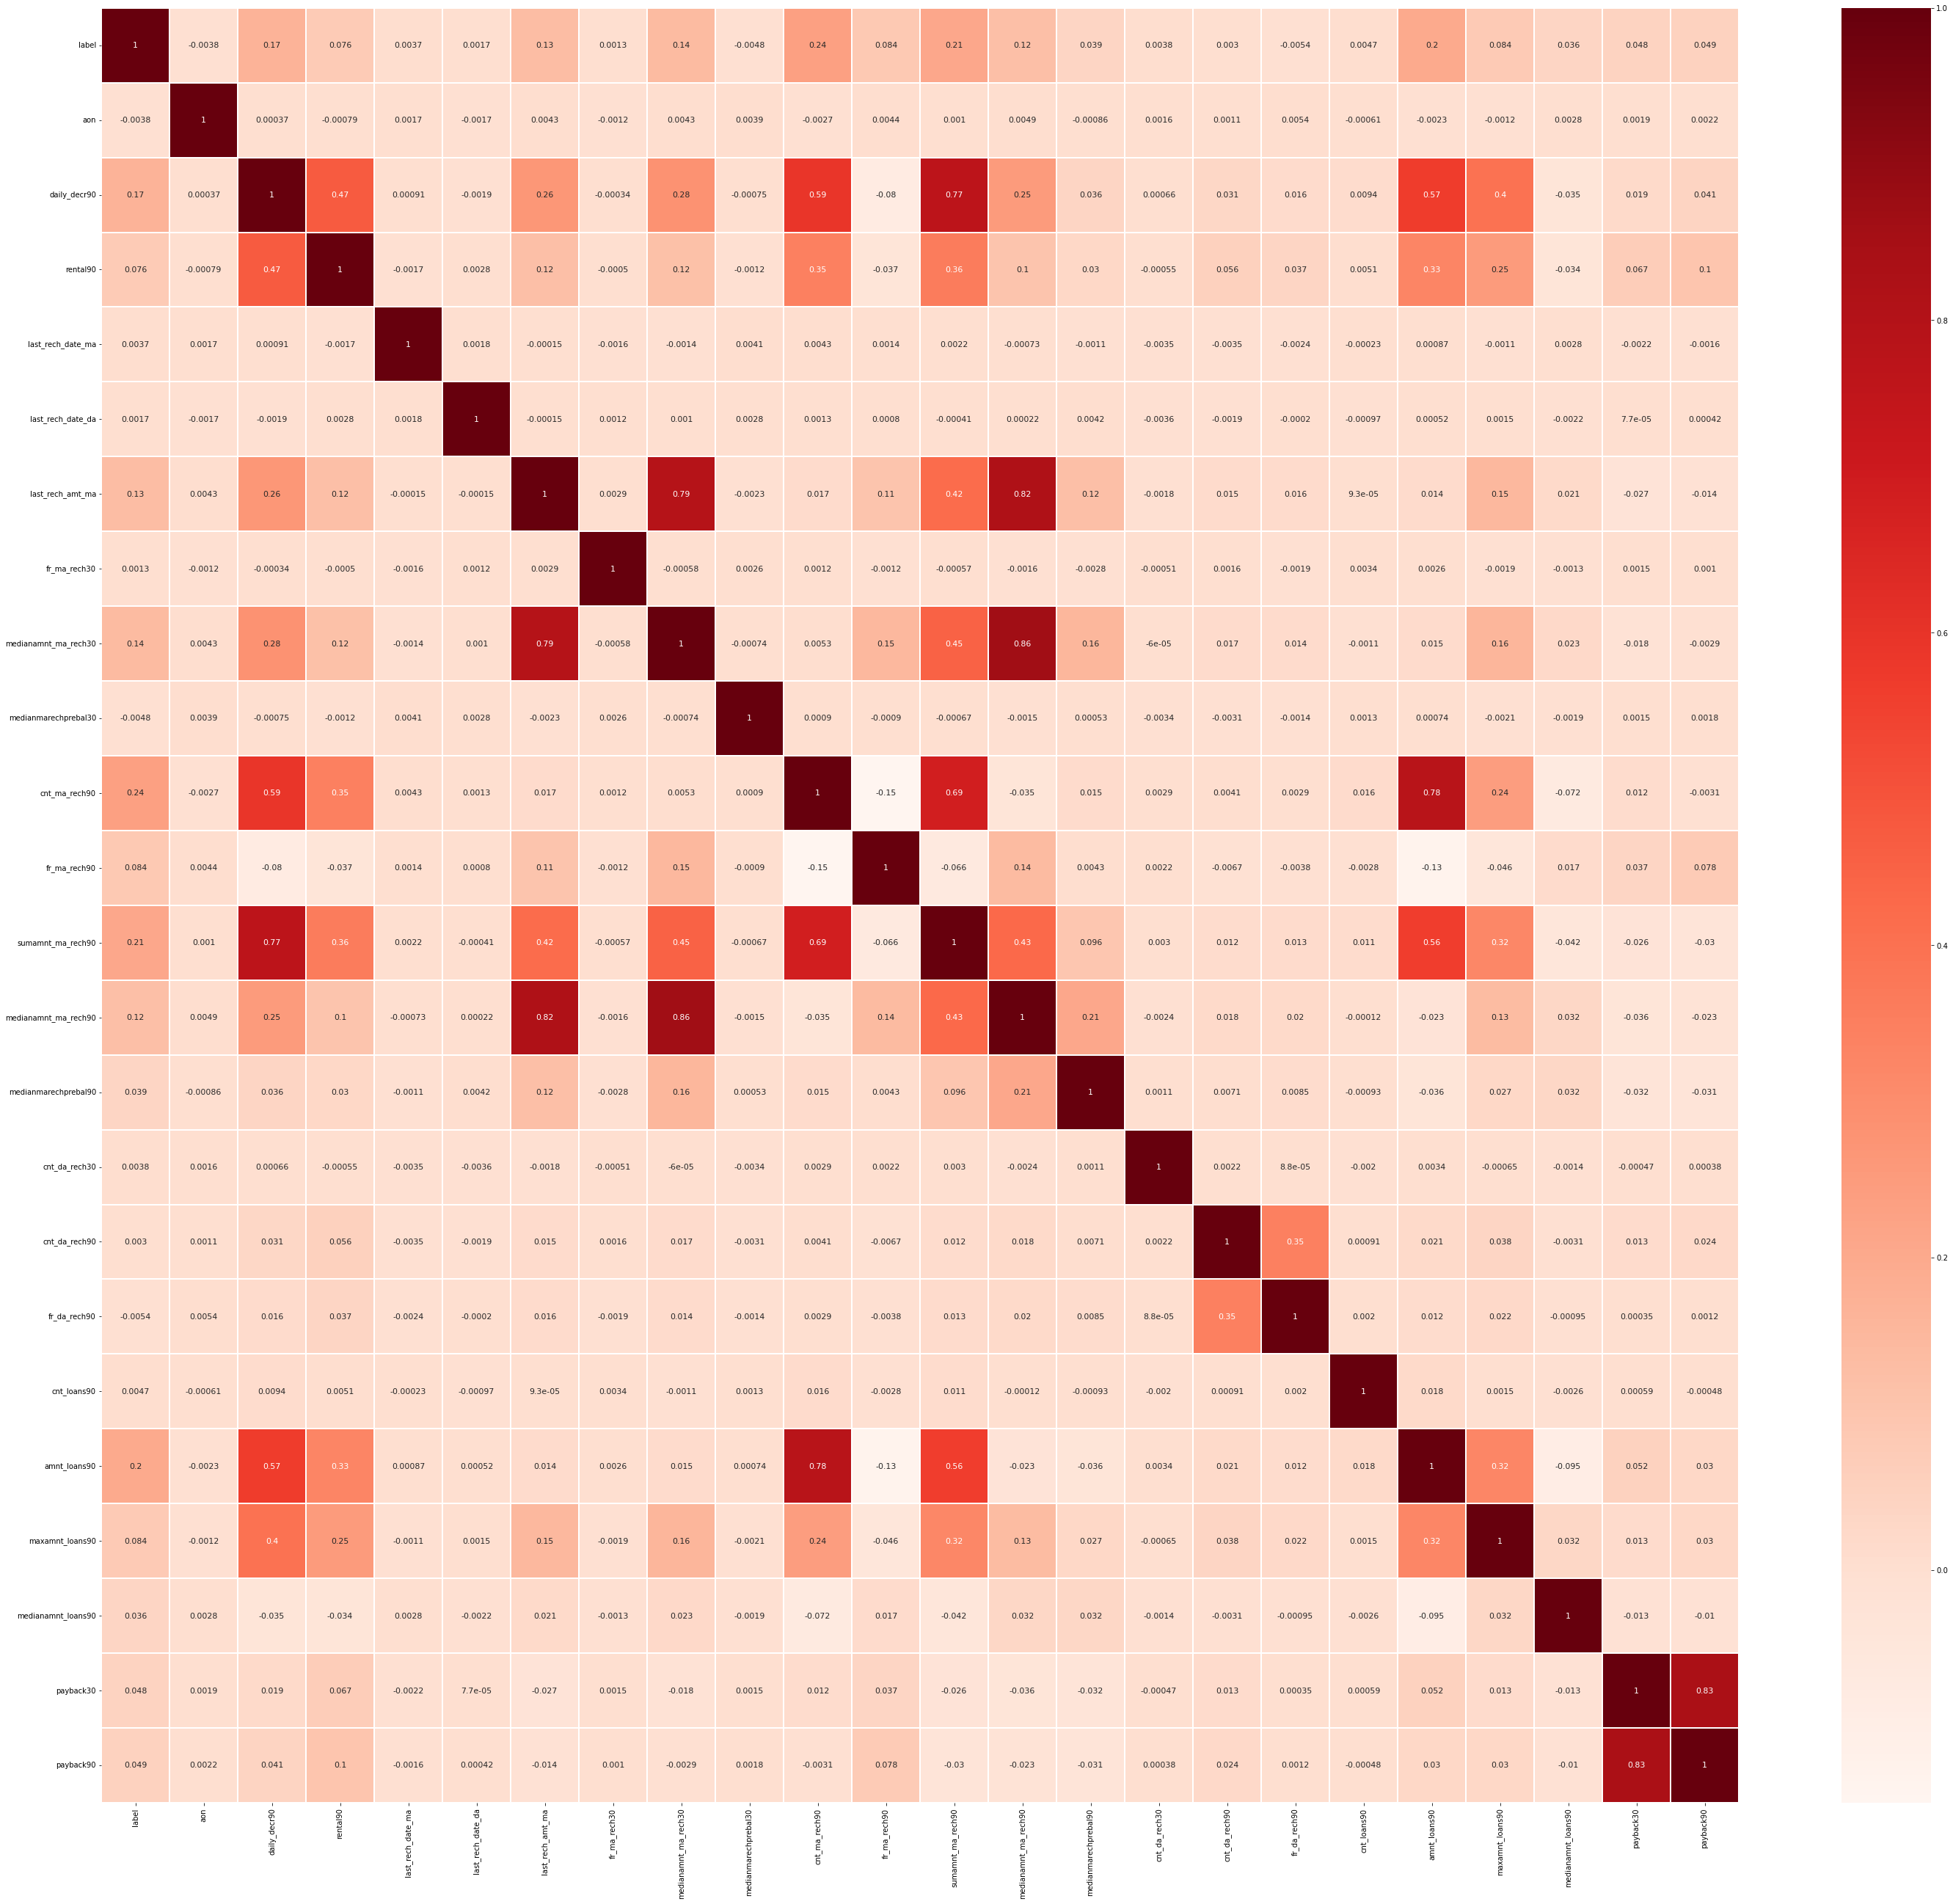

In [48]:
df.drop(['fr_da_rech30','maxamnt_loans30','rental30','cnt_ma_rech30','sumamnt_ma_rech30','cnt_loans30','amnt_loans30','medianamnt_loans30'],axis=1,inplace=True)
plt.figure(figsize=(50,45))
sns.heatmap(df.corr(), linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":11})

# Data Preprocessing

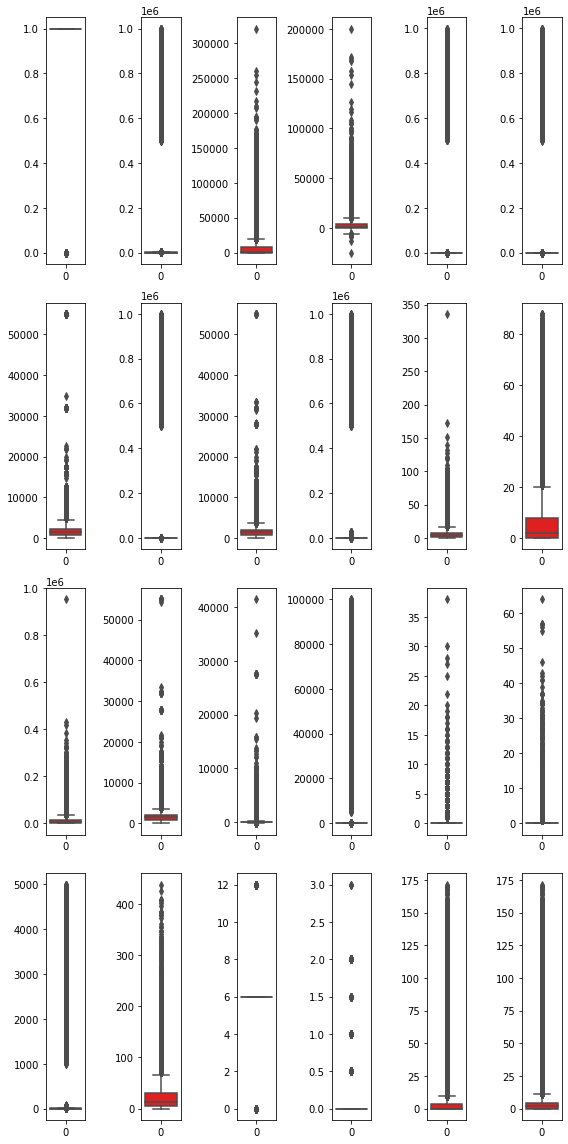

In [49]:
collist=df.columns.values
ncol=6
nrows=4
plt.figure(figsize=(2*nrows,4*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='red')
    plt.tight_layout()

Since there are a lot many outliers, let's check for the once with zscore greater than 5

In [50]:
from scipy.stats import zscore

In [ ]:
dfzscore=np.abs(zscore(df))
dfnew=df[(dfzscore<5).all(axis=1)]
df=dfnew
df

note : got error --memory insufficient

In [ ]:
data.skew()

There's a lot of skewness in 'cnt_da_rech30 ','fr_da_rech90 ','cnt_loans90'.we will treat this using power transfomation technique

In [ ]:
x=data.drop(['label'],axis=1)
y=data['label']
from sklearn.preprocessing import power_transform
a=power_transform(x,method='yeo-johnson')

We have separated the features and target into x and y. also we have treated the skewness using poer transformation technique

In [ ]:
scale = StandardScaler()
x=scale.fit_transform(x)

scaling for the better results

In [ ]:
smt=SMOTE()
x,y = smt.fit_resample(x,y)
sns.countplot(y)

Treating Class imbalnce of target variable using over sampling technique

# Model Building

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print('Accuracy Score of GaussianNB is',accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)
print('Accuracy Score of Logistic Regression is', accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

In [ ]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd.score(x_train,y_train)
predsgd=sgd.predict(x_test)
print('Accuracy score of SGDClassifier is',accuracy_score(y_test,predsgd))
print(confusion_matrix(y_test,predsgd))
print(classification_report(y_test,predsgd))

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy score of DecisionTree Classifier is',accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

In [ ]:
gc = GradientBoostingClassifier()
gc.fit(x_train,y_train)
gc.score(x_train,y_train)
predgc=gc.predict(x_test)
print('Accuracy Score of GradientBoostingClassifier is',accuracy_score(y_test,predgc))
print(confusion_matrix(y_test,predgc))
print(classification_report(y_test,predgc))

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForest Classifier is',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

# Cross Validation Score

In [ ]:
print("CVS for GaussianNB =",cvs(gnb,x,y,cv=5).mean()*100,"%")
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for SGDClassifier =",cvs(sgd,x,y,cv=5).mean()*100,"%")
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for GradientBoostingClassifier =",cvs(gc,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")

From the Accuracy score and Cross validation score , we choose 'RandomForestClassifier' for hyper parameter tuning as it has the high accuracy and least difference between accuracy score and cross validation score

# Hyper Parameter Tuning

note its taking long time to run and outout not coming 

In [ ]:
parameter={'n_estimators':np.arange(50,300,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

In [ ]:
Micro = RandomForestClassifier(criterion='entropy', n_estimators=200, max_features='sqrt', class_weight='balanced')
Micro.fit(x_train,y_train)
pred=Micro.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier of Final MicroCredit Label Prediction Model is ", acc*100, "%.")

In [ ]:
print(confusion_matrix(y_test,pred))
print("\n",classification_report(y_test,pred))

# AUC-ROC CURVE

In [ ]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusion

In [ ]:
a= np.array(y_test)
predicted = np.array(Micro.predict(x_test))
MCS_Prediction=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
MCS_Prediction

# Model Saving

In [ ]:
import pickle
filename = 'MicroCredit.pkl'
pickle.dump(Micro,open(filename,'wb'))